In [3]:
using Plots
using Flux
using StaticArrays

┌ Info: Precompiling Flux [587475ba-b771-5e3f-ad9e-33799f191a9c]
└ @ Base loading.jl:1278


In [4]:
n = 100
dx = rand(n)
dy = sin.(4*pi*dx) + 0.00*randn(n);

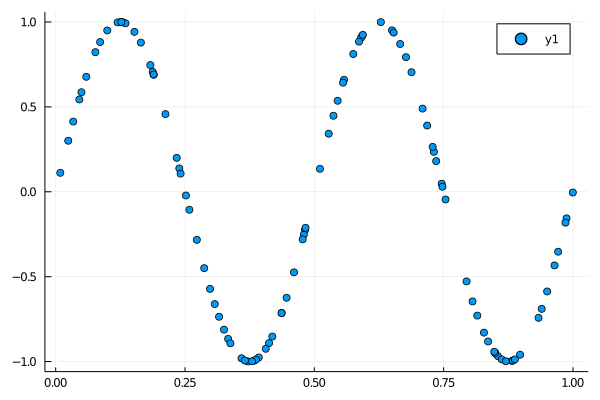

In [5]:
scatter(dx, dy)

In [19]:
m = Chain(Dense(1,50,σ), Dense(50,50,σ), Dense(50,1))

Chain(Dense(1, 50, σ), Dense(50, 50, σ), Dense(50, 1))

In [20]:
loss(x, y) = Flux.mse(m(x), y)

loss (generic function with 1 method)

In [21]:
ps = Flux.params(m)

Params([Float32[-0.14232565; 0.21846558; … ; -0.022070603; 0.17646718], Float32[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], Float32[-0.07092762 -0.23591734 … 0.17654885 -0.15817347; -0.056623846 -0.05571426 … 0.17700852 0.1300559; … ; -0.20866242 -0.1728621 … -0.09174934 -0.017608125; -0.048084192 0.20233765 … -0.21299824 0.008659083], Float32[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], Float32[0.071181394 0.16970816 … 0.32919395 -0.08250553], Float32[0.0]])

In [22]:
data = [(SVector(dx[i]), SVector(dy[i])) for i in 1:length(dx)]

100-element Array{Tuple{SArray{Tuple{1},Float64,1,1},SArray{Tuple{1},Float64,1,1}},1}:
 ([0.6771670140451409], [0.7927127508745186])
 ([0.9875071134056452], [-0.15634617525912353])
 ([0.4819119429704737], [-0.2253489932171927])
 ([0.2871312959213861], [-0.44985736589545006])
 ([0.55736145484044], [0.6600049129877191])
 ([0.8058540263566605], [-0.6456562805162268])
 ([0.5925635978631356], [0.9180717308977424])
 ([0.04984387618200503], [0.5861969037557401])
 ([0.18297194752174994], [0.7461758801345224])
 ([0.02429297527785157], [0.3005550241299159])
 ([0.12990476577250765], [0.9981011581860879])
 ([0.84958986702578], [-0.9494512547297809])
 ([0.33339956531378556], [-0.8664412515880322])
 ⋮
 ([0.30750836395652836], [-0.6613907017778395])
 ([0.5369468193270948], [0.44778577247042134])
 ([0.21219641979268777], [0.4573862899628173])
 ([0.8150294072658582], [-0.7292215469594375])
 ([0.29844777048400317], [-0.5718938386973844])
 ([0.665957924846931], [0.8704441537207468])
 ([0.1522849377327022

1000

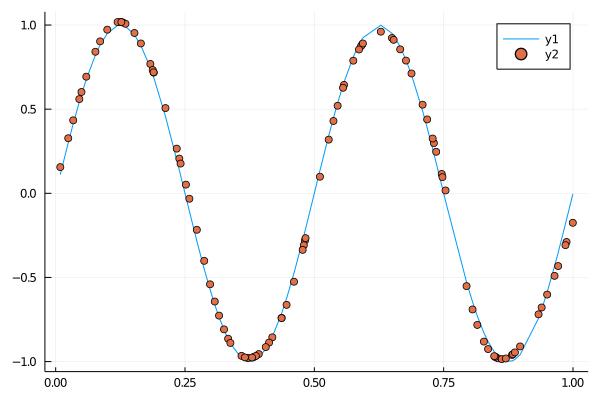

In [23]:
for i in 1:1000
    Flux.train!(loss, ps, data, ADAM())
    if i%10 == 0
        p = plot(sort(dx), x->(sin(4*pi*x)))
        scatter!(p, dx, [first(y) for y in m.(d[1] for d in data)])
        IJulia.clear_output(true)
        display(i)
        display(p)
    end
end

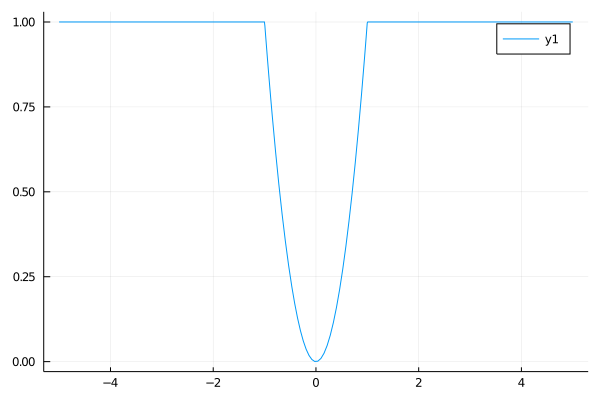

In [11]:
mynl(x) = min(1.0, max(0.0, x^2))
plot(mynl)

In [12]:
m = Chain(Dense(1,50,mynl), Dense(50,50,mynl), Dense(50,1))

Chain(Dense(1, 50, mynl), Dense(50, 50, mynl), Dense(50, 1))

In [13]:
@which Dense(50,50, σ)

(::Type{Dense})(in::Integer, out::Integer, σ; initW, initb) in Flux at /home/zach/.julia/packages/Flux/goUGu/src/layers/basic.jl:114